# The random walk 

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

## Simulate a random walk 

In [3]:
# Set seed
np.random.seed(0)

# steps
steps = np.random.standard_normal(1000)

# First step
steps[0] = 0

# random walk
random_walk = np.cumsum(steps)

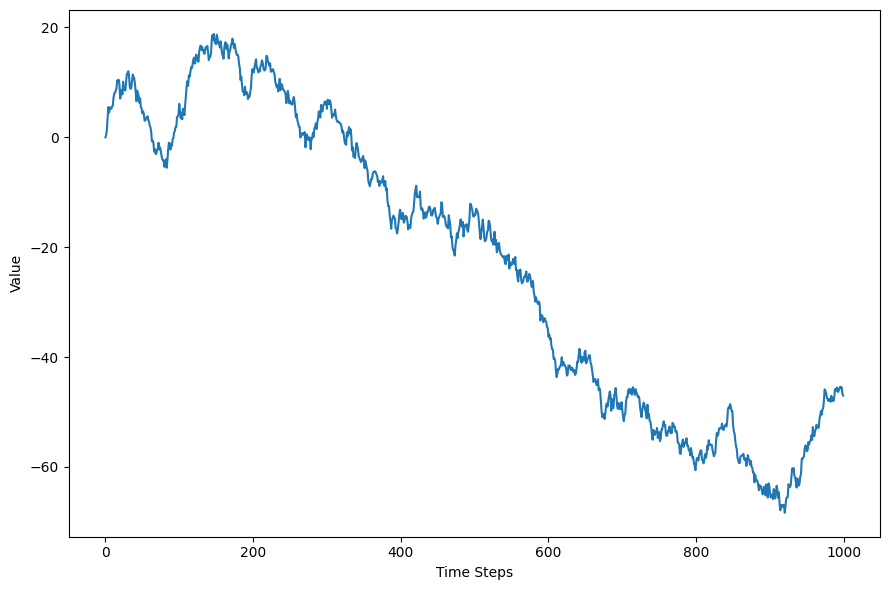

In [4]:
# Visulaise
fig, ax = plt.subplots()

# plot graph
ax.plot(random_walk)
ax.set_xlabel('Time Steps')
ax.set_ylabel('Value')

plt.tight_layout()

### Compare a stationary and a non-stationary series 

In [6]:
# Simulate staionary and non stationary series
def simulate_timeseries(is_stationary):

    # Set seed
    np.random.seed(0)

    # Create empty series
    process = np.empty(400)

    # condition
    if is_stationary:

        alpha = 0.8
        process[0] = 0

    else:

        alpha = 1
        process[0] = 0

    for i in range(400):

        if i + 1 < 400:
            process[i + 1] = alpha * process[i] + np.random.standard_normal()
        
        else:
            break
    
    return process


In [7]:
# get simulations
stationary = simulate_timeseries(True)
non_stationary = simulate_timeseries(False)

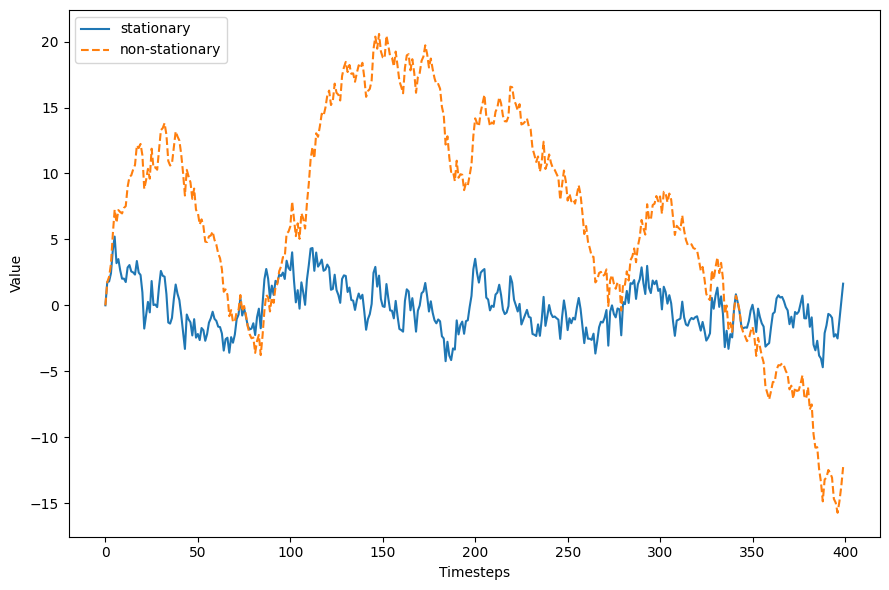

In [8]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle='-', label='stationary')
ax.plot(non_stationary, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()

In [9]:
# Define function
def mean_over_time(process):

    # Make container
    mean_func = []

    # Loop
    for i in range(len(process)):

        # Append mean of process up to this point
        mean_func.append(np.mean(process[:i]))

    return mean_func


In [10]:
# Now do for both stationary and non stationary
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

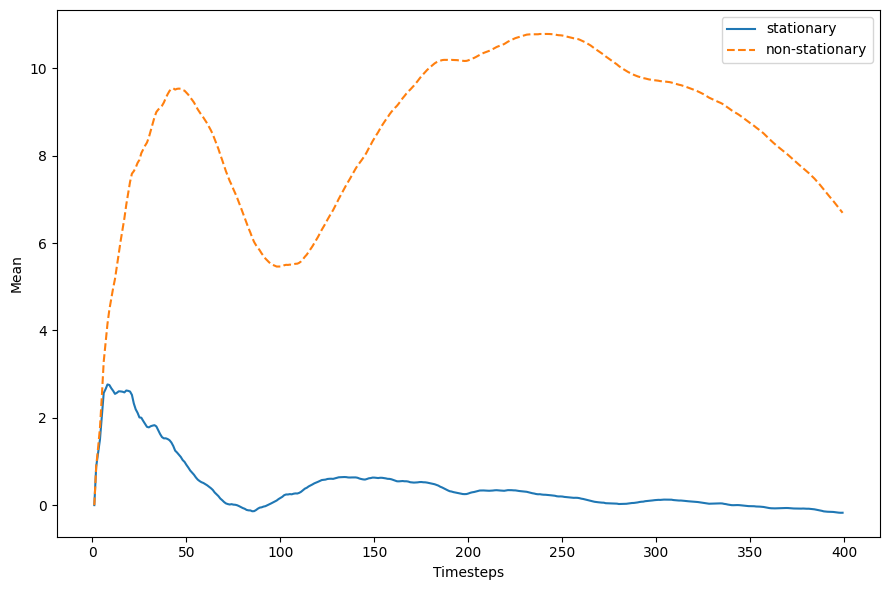

In [11]:
fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()

In [12]:
# REpeat for variance over time
def var_over_time(process):

    # Make container
    var_func = []

    # Loop
    for i in range(len(process)):

        # Append mean of process up to this point
        var_func.append(np.var(process[:i]))

    return var_func
    

In [13]:
# Get var over time
stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

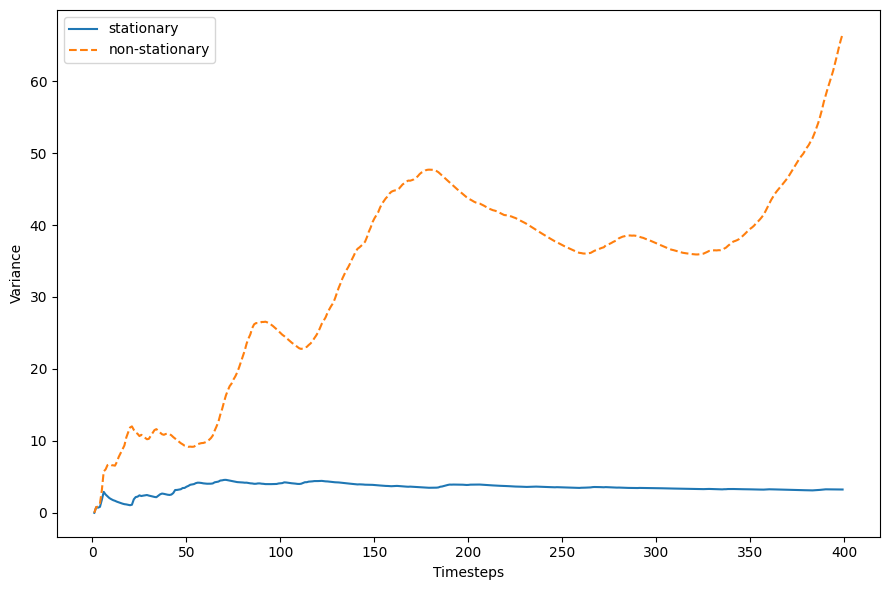

In [14]:
fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()

### using the Augmented Dickey-Fuller (ADF) test for stationarity 

In [15]:
# perform test
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.5437433594783733
p-value: 0.8831939389121155


In [16]:
# perform differencing
diff_random_walk = np.diff(random_walk, 1)

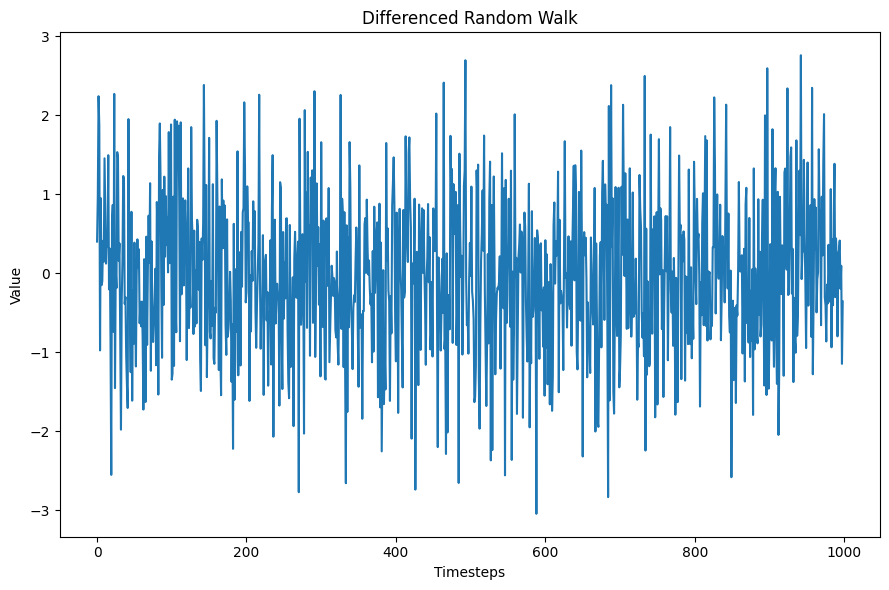

In [17]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')

plt.tight_layout()

In [18]:
# get ADF result
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -32.4248872069162
p-value: 0.0


### Plot the autocorrelation function (ACF) 

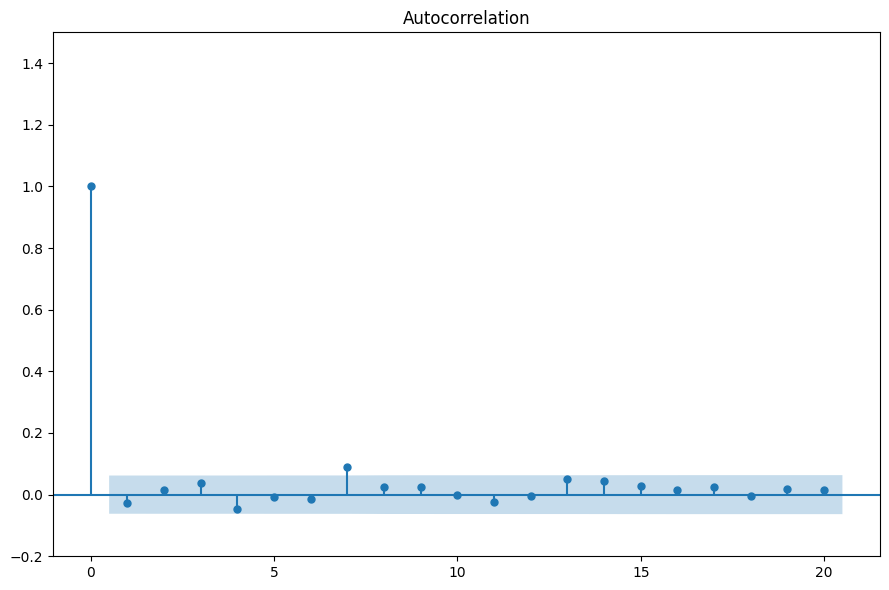

In [19]:
# Plot autro correelation
plot_acf(diff_random_walk, lags=20)

plt.ylim(-0.2, 1.5)
plt.tight_layout()

## Is AMZN a random walk? 

In [20]:
# Daily closing price of AMZN (Amazon) stock from October 5th 2021 to October 5th 2022
df = pd.read_csv('./data/AMZN.csv')
print(df.shape)
df.head()

(253, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000
1,2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000
2,2021-10-07,164.576996,166.287506,164.153000,165.121506,165.121506,48182000
3,2021-10-08,165.850006,166.071503,164.410004,164.431000,164.431000,39964000
4,2021-10-11,163.750000,164.629501,161.904999,162.315002,162.315002,40684000


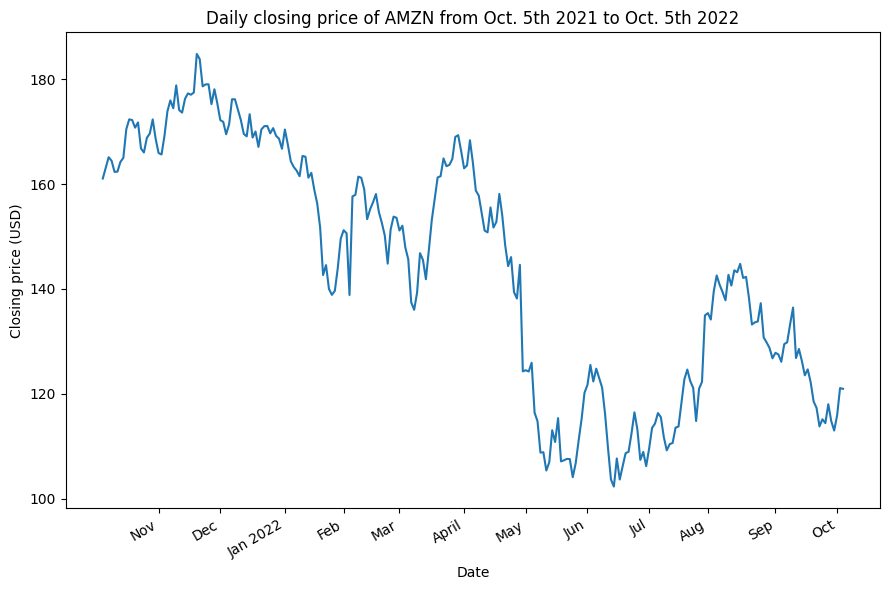

In [21]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [19, 40, 62, 82, 101, 123, 144, 165, 186, 206, 229, 250], 
    ['Nov', 'Dec', 'Jan 2022', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')
fig.autofmt_xdate()
plt.tight_layout()

In [22]:
# ADF Test

AMZN_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {AMZN_ADF_result[0]}')
print(f'p-value: {AMZN_ADF_result[1]}')

ADF Statistic: -1.2571399125314042
p-value: 0.6485457929359854


In [23]:
# get the differencing
diff_close = np.diff(df['Close'], 1)

In [24]:
# Now do ADF of differencing
AMZN_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {AMZN_diff_ADF_result[0]}')
print(f'p-value: {AMZN_diff_ADF_result[1]}')

ADF Statistic: -16.316929753009752
p-value: 3.155381839110065e-29


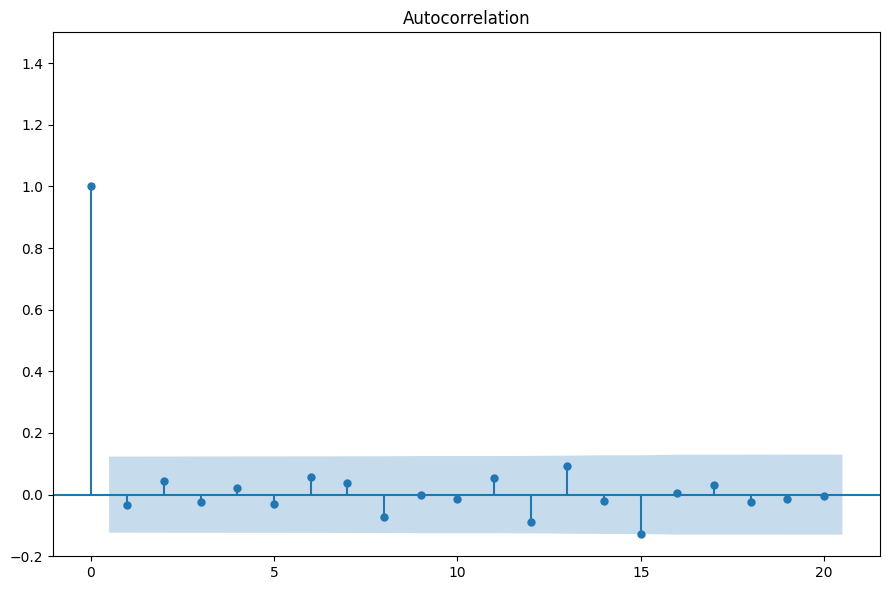

In [25]:
# Look at autocorrelation
plot_acf(diff_close, lags=20)

plt.ylim(-0.2, 1.5)
plt.tight_layout()

### Is Amazon a random Walk

Well we did 2 tests here.

1. We checked if the first order difference (i.e. difference between adjacent time steps) was stationary.  The Augmented Dickey Fuller test produced a p-value of less than 0.05

2. The stationary process was uncorrelated because all of the points after zero are NOT signigicantly different from one another i.e. they are in the blue band of uncertainty

## Forecasting a random walk
### Forecasting on a long horizon

In [28]:
# make a df
df = pd.DataFrame({'value' : random_walk})

# make train and test
train = df[:800]
test = df[800:]

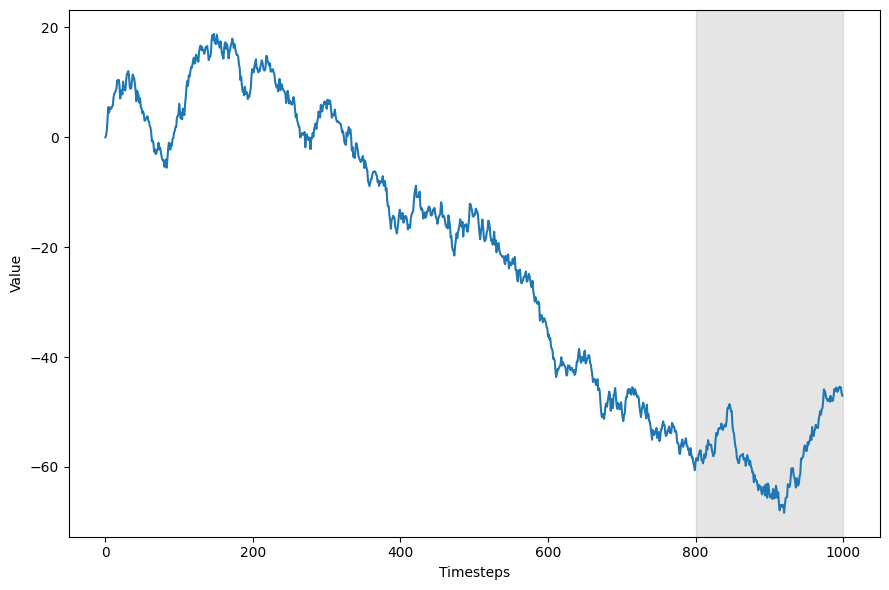

In [29]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()

In [30]:
# Get baseline models
mean = np.mean(train.value)

test.loc[:, 'pred_mean'] = mean 
test.head()

,value,pred_mean
800,-59.178089,-14.296577
801,-58.392285,-14.296577
802,-58.449755,-14.296577
803,-58.840972,-14.296577
804,-57.900054,-14.296577


In [35]:
# Last value
last_value = train.iloc[-1].value

test.loc[:, 'pred_last'] = last_value
test.head()

,value,pred_mean,last_value,pred_drift,pred_last
800,-59.178089,-14.296577,-60.589261,-60.740924,-60.589261
801,-58.392285,-14.296577,-60.589261,-60.816755,-60.589261
802,-58.449755,-14.296577,-60.589261,-60.892587,-60.589261
803,-58.840972,-14.296577,-60.589261,-60.968418,-60.589261
804,-57.900054,-14.296577,-60.589261,-61.044250,-60.589261


In [36]:
# Calculate drift
deltaX = 800 - 1
deltaY = last_value - 0

# define drift
drift = deltaY / deltaX

# create steps
x_vals = np.arange(801, 1001, 1)

# predicted drift - drift multiplied by  eact "time step"
pred_drift = drift * x_vals

#  Now add to test df
test.loc[:, 'pred_drift'] = pred_drift

test.head()



,value,pred_mean,last_value,pred_drift,pred_last
800,-59.178089,-14.296577,-60.589261,-60.740924,-60.589261
801,-58.392285,-14.296577,-60.589261,-60.816755,-60.589261
802,-58.449755,-14.296577,-60.589261,-60.892587,-60.589261
803,-58.840972,-14.296577,-60.589261,-60.968418,-60.589261
804,-57.900054,-14.296577,-60.589261,-61.044250,-60.589261


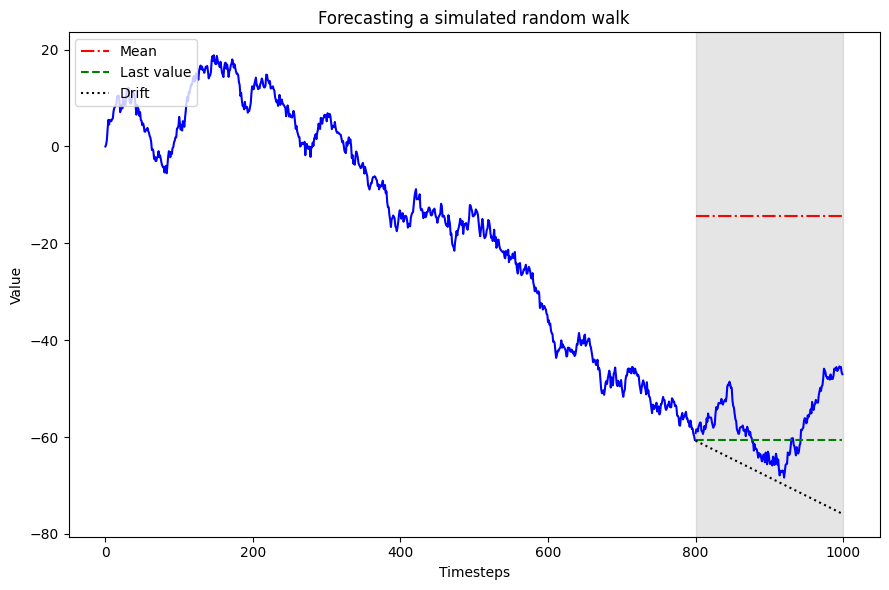

In [37]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.title('Forecasting a simulated random walk')

plt.tight_layout()

#### Evaluation 

In [38]:
from sklearn.metrics import mean_absolute_error

mae_mean = mean_absolute_error(test['value'], test['pred_mean'])
mae_last = mean_absolute_error(test['value'], test['pred_last'])
mae_drift = mean_absolute_error(test['value'], test['pred_drift'])

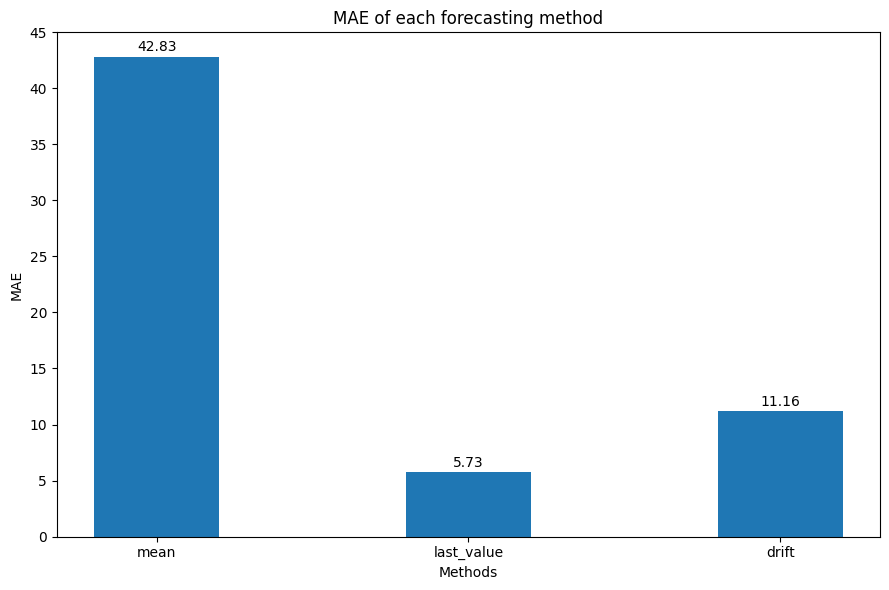

In [39]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mae_mean, mae_last, mae_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MAE')
ax.set_ylim(0, 45)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.5, s=str(round(value, 2)), ha='center')

plt.title('MAE of each forecasting method')
plt.tight_layout()

### Forecasting the closing price of AMZN 

Forecast the last 50 time steps of the AMZN closing price

In [46]:
AMZN_df = pd.read_csv('./data/AMZN.csv')

AMZN_train = AMZN_df.iloc[:-50, :]
AMZN_test = AMZN_df.iloc[-50:, :]

print(AMZN_train.shape, AMZN_test.shape)

(203, 7) (50, 7)


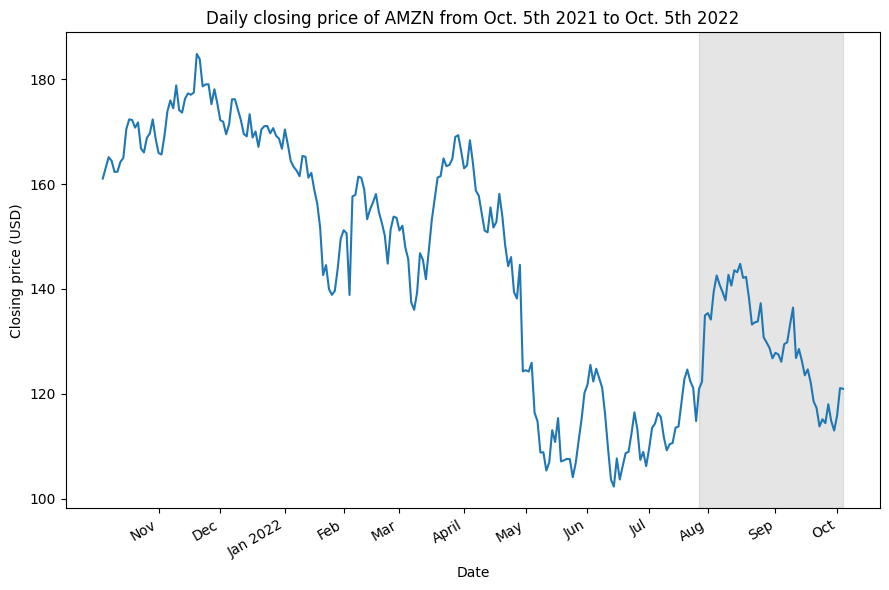

In [47]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(AMZN_df['Date'], AMZN_df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [19, 40, 62, 82, 101, 123, 144, 165, 186, 206, 229, 250], 
    ['Nov', 'Dec', 'Jan 2022', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

ax.axvspan(203, 252, color='#808080', alpha=0.2)

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')

fig.autofmt_xdate()
plt.tight_layout()

In [48]:
AMZN_test


,Date,Open,High,Low,Close,Adj Close,Volume
203,2022-07-27,117.309998,121.900002,117.160004,120.970001,120.970001,61582000
204,2022-07-28,121.570000,122.839996,118.080002,122.279999,122.279999,82245500
205,2022-07-29,134.899994,137.649994,132.410004,134.949997,134.949997,148892900
206,2022-08-01,134.960007,138.830002,133.509995,135.389999,135.389999,76846900
207,2022-08-02,134.720001,137.440002,134.089996,134.160004,134.160004,61922400
208,2022-08-03,136.210007,140.490005,136.050003,139.520004,139.520004,71827800
209,2022-08-04,140.580002,143.559998,139.550003,142.570007,142.570007,70585000
210,2022-08-05,140.100006,142.860001,139.600006,140.800003,140.800003,50686900
211,2022-08-08,142.050003,144.229996,138.289993,139.410004,139.410004,52229000
212,2022-08-09,138.050003,138.949997,136.210007,137.830002,137.830002,40434700


In [55]:
# Predict the historical mean
mean = np.mean(AMZN_train.Close)
AMZN_test.loc[:, 'pred_mean'] = mean
# Predict the mean of the last known 50 days
mean_50 = np.mean(AMZN_train.Close[-50:])
AMZN_test.loc[:, 'pred_mean_50'] = mean_50
# Predict the last known value
last_val = AMZN_train.Close.iloc[-1]
AMZN_test.loc[:, 'pred_last'] = last_val

# Predict with drift
deltaX = 203 - 1
deltaY = last_val - AMZN_train.Close.iloc[0]

drift = deltaY/deltaX

pred_drift = drift * AMZN_test.index.values + AMZN_train.Close.iloc[0]

AMZN_test.loc[:, 'pred_drift'] = pred_drift

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


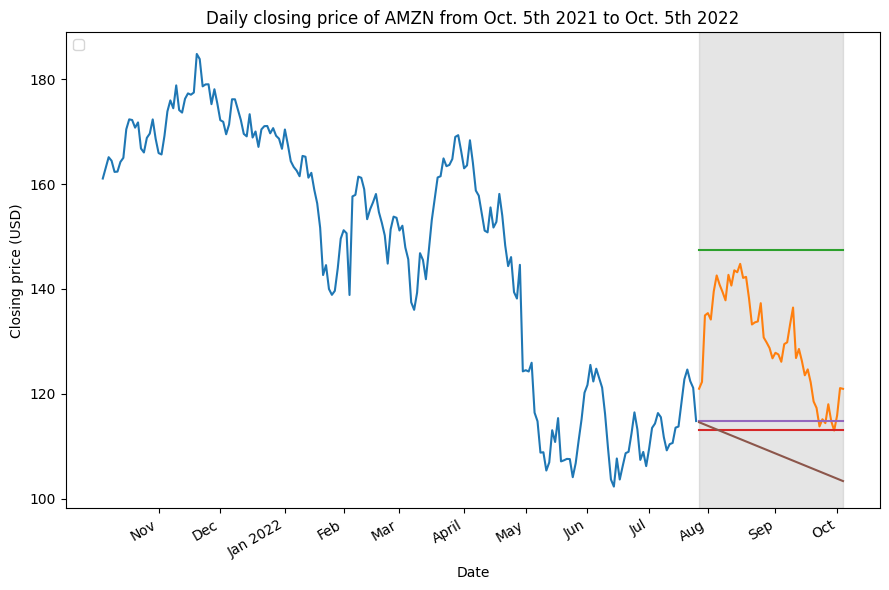

In [56]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(AMZN_train['Close'])
ax.plot(AMZN_test['Close'])
ax.plot(AMZN_test['pred_mean'])
ax.plot(AMZN_test['pred_mean_50'])
ax.plot(AMZN_test['pred_last'])
ax.plot(AMZN_test['pred_drift'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
ax.legend(loc=2)

plt.xticks(
    [19, 40, 62, 82, 101, 123, 144, 165, 186, 206, 229, 250], 
    ['Nov', 'Dec', 'Jan 2022', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

ax.axvspan(203, 252, color='#808080', alpha=0.2)

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')

fig.autofmt_xdate()
plt.tight_layout()

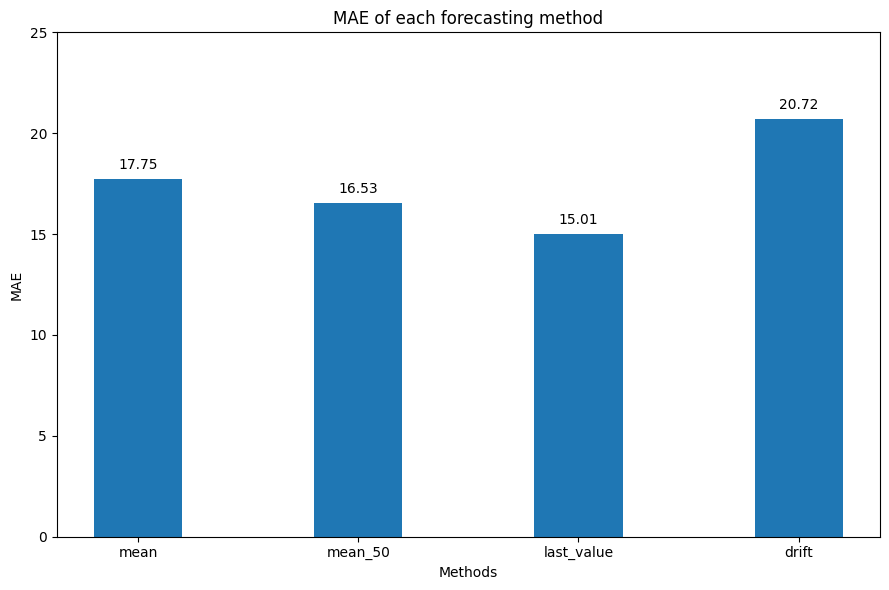

In [57]:
mae_mean = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_mean'])
mae_mean_50 = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_mean_50'])
mae_last = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_last'])
mae_drift = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_drift'])

fig, ax = plt.subplots()

x = ['mean', 'mean_50', 'last_value', 'drift']
y = [mae_mean, mae_mean_50, mae_last, mae_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MAE')
ax.set_ylim(0, 25)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.5, s=str(round(value, 2)), ha='center')

plt.title('MAE of each forecasting method')
plt.tight_layout()

### Forecasting the next time step 

In [58]:
# Shift along by 1
df_shift = df.shift(1)
df_shift.head()

,value
0,NaN
1,0.000000
2,0.400157
3,1.378895
4,3.619788


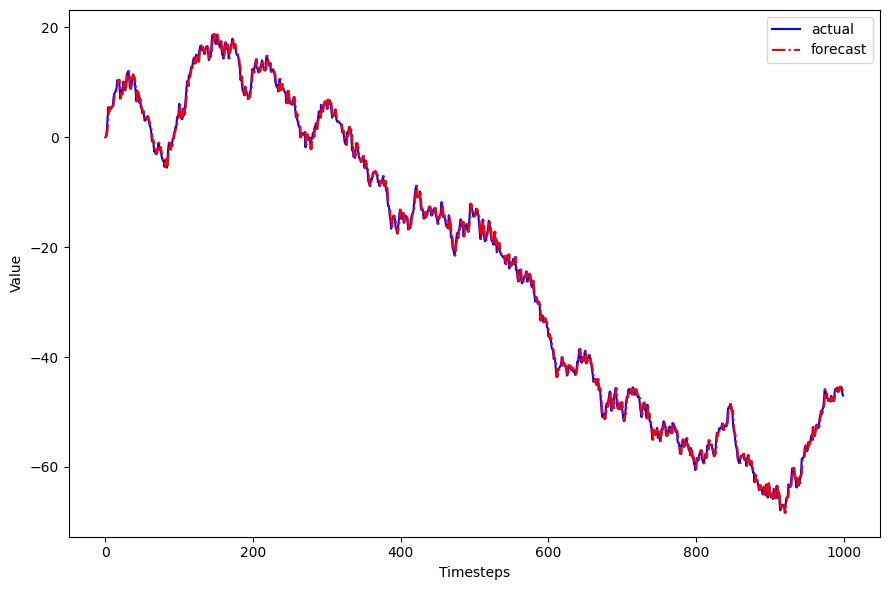

In [59]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc='best')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

#### Evaluation 

In [60]:
# Check mean absolute error
mae_one_step = mean_absolute_error(test['value'], df_shift[800:])
mae_one_step

0.7397491936153824

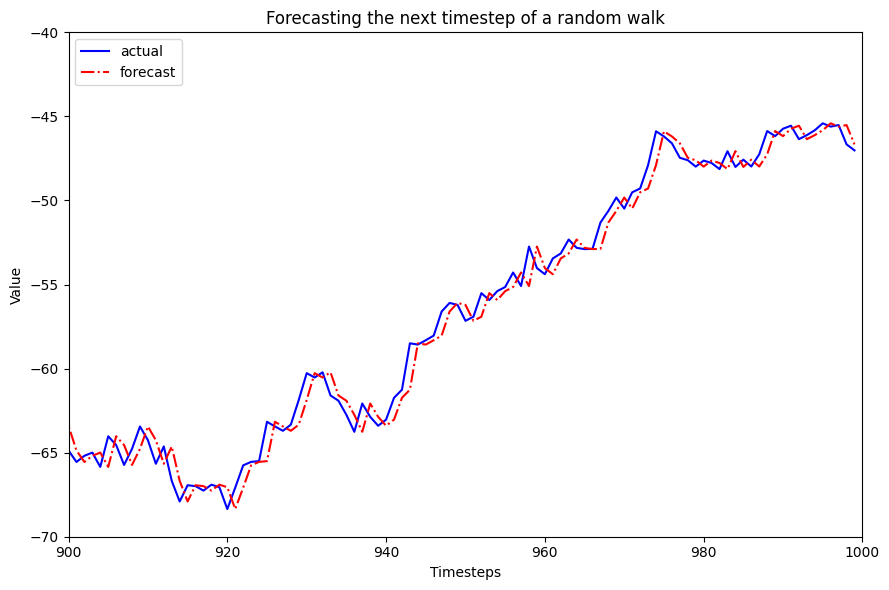

In [61]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(-70, -40)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.title('Forecasting the next timestep of a random walk')

plt.tight_layout()